In [98]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange, sample
from collections import namedtuple
import pandas as pd

In [99]:
game_map = [
    [0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0],
    [2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
    [2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0],
    [2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2],
    [2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2],
    [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2],
    [2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2],
    [2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0]
]
game_map = [
    [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
    [2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2],
    [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2],
    [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
    [2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2],
    [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0]
]
density_map = []
local_minima_map = []
walkable_tiles = []
delivery_zones = []
for y, row in enumerate(game_map):
    density_map.append([])
    local_minima_map.append([])
    
    for x, tile in enumerate(row):
        local_minima_map[-1].append(0)
        if tile == 1:
            density_map[-1].append(0)        
            walkable_tiles.append((y, x))
        elif tile == 2:
            delivery_zones.append((y,x))
            density_map[-1].append(-1)
        else:
            density_map[-1].append(-2)
Parcel = namedtuple("Parcel", "y x value")
def generate_parcel(n_parcel, sigma):
    return [Parcel(y, x, int(np.random.normal(5, sigma))) for (y, x) in sample(walkable_tiles, n_parcel)]

def get_neighbors(y, x, game_map, map_lim):
    neighbors = []
    if x > 0:
        neighbors.append((y, x-1))
    if y > 0:
        neighbors.append((y-1, x))
    if x < map_lim - 1:
        neighbors.append((y, x+1))
    if y < map_lim - 1:
        neighbors.append((y+1, x))

    return list(filter(lambda neigh: game_map[neigh[0]][neigh[1]] == 1, neighbors)) 

def bfs_with_udpate(game_map, density_map, parcels):
    values = {(parcel.y, parcel.x): parcel.value for parcel in parcels}
    visited = {(parcel.y, parcel.x) for parcel in parcels}
    queue = [(parcel.y, parcel.x) for parcel in parcels]

    while queue:
        current = queue.pop(0)
        #print(current)
        y, x = current[0], current[1]
        value = values[(y,x)]
        for neigh in get_neighbors(y, x, game_map, len(game_map)):
            if value - 1 <= 0 or neigh in visited:
                continue
            values[neigh] = value - 1
            density_map[y][x] += values[neigh]
            queue.append(neigh)
            visited.add(neigh)

Parcel(y=5, x=10, value=5)
Parcel(y=1, x=12, value=7)
Parcel(y=7, x=12, value=5)
Parcel(y=13, x=2, value=6)
Parcel(y=7, x=9, value=4)
Parcel(y=3, x=16, value=7)
Parcel(y=7, x=6, value=1)
Parcel(y=13, x=18, value=11)
Parcel(y=3, x=18, value=4)
Parcel(y=16, x=16, value=10)
Parcel(y=5, x=6, value=9)
Parcel(y=3, x=2, value=5)
Parcel(y=3, x=6, value=1)
Parcel(y=11, x=14, value=5)
Parcel(y=17, x=6, value=10)


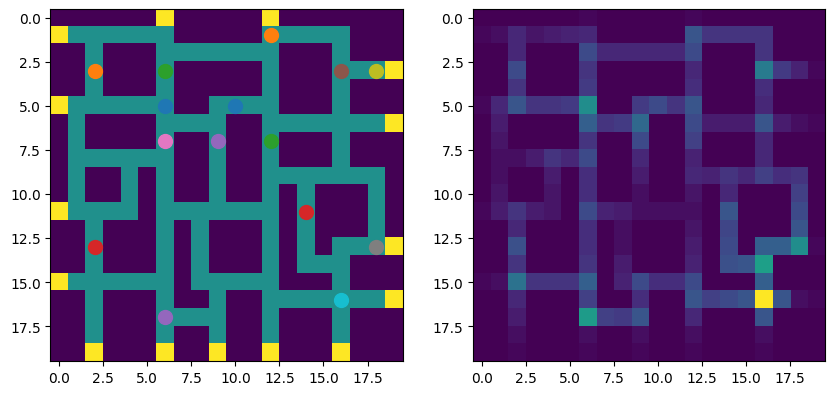

In [100]:
parcels = generate_parcel(15, 3)
[bfs_with_udpate(game_map, density_map, [parcel]) for parcel in parcels]
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(game_map)
for parcel in parcels:
    print(parcel)
    axs[0].scatter(parcel.x, parcel.y, s=100)
axs[1].imshow(density_map)

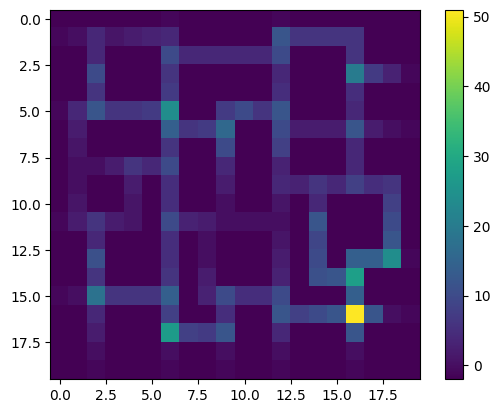

In [101]:
plt.imshow(density_map)
plt.colorbar()

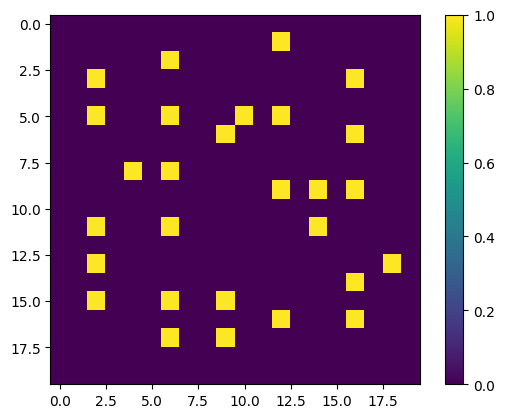

In [102]:
minimas = []
for y, row in enumerate(density_map):
    for x, tile in enumerate(row):
        neighbors = get_neighbors(y, x, game_map, len(game_map))
        if all(map(lambda n: density_map[y][x] > density_map[n[0]][n[1]], neighbors)) and (y, x) in walkable_tiles:
            local_minima_map[y][x] = 1
            minimas.append((y, x))

plt.imshow(local_minima_map)
plt.colorbar()

In [103]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(minimas)
kmeans = model.predict(minimas)

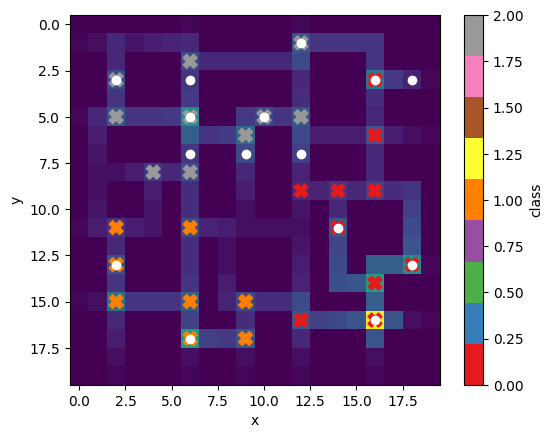

In [104]:
Y = [m[0] for m in minimas]
X = [m[1] for m in minimas]

df = pd.DataFrame({'x': X, 'y': Y, 'class': kmeans})
fig, ax = plt.subplots(1)
df.plot.scatter(x='x', y='y', c='class', cmap='Set1', ax=ax, s=100, marker='X')
for parcel in parcels:
    ax.scatter(parcel.x, parcel.y, c='white')
#ax.imshow(local_minima_map)
ax.imshow(density_map)

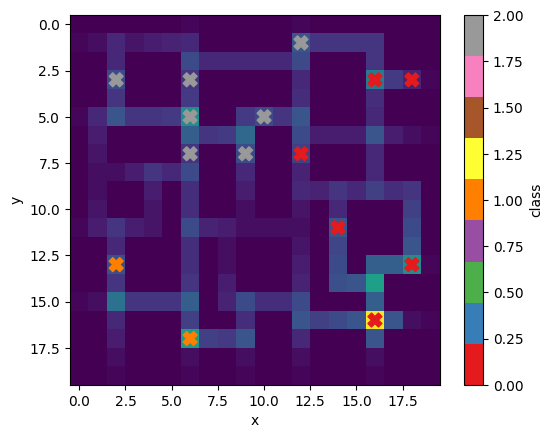

In [105]:
Y = [p.y for p in parcels]
X = [p.x for p in parcels]
dataset = [(p.y, p.x) for p in parcels]

df = pd.DataFrame({'x': X, 'y': Y, 'class': model.predict(dataset)})
fig, ax = plt.subplots(1)
df.plot.scatter(x='x', y='y', c='class', cmap='Set1', ax=ax, s=100, marker='X')
#for parcel in parcels:
    #ax.scatter(parcel.x, parcel.y, c='white')
#ax.imshow(local_minima_map)
ax.imshow(density_map)